In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# model
from darts import TimeSeries
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, ARIMA
#from statsmodels.tsa.filters.hp_filter import hpfilter 
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
#from statsmodels.tsa.holtwinters import ExponentialSmoothing 
#from darts.metrics import rmse, r2_score

In [12]:
# Load the electric dataset(CSV) into a Pandas DataFrame
df_el = pd.read_csv('Day-ahead Prices.csv')
# Select the desired columns
df_el = df_el[['MTU (CET/CEST)', 'Day-ahead Price [EUR/MWh]']]

# Rename the columns
df_el = df_el.rename(columns={'MTU (CET/CEST)': 'date', 'Day-ahead Price [EUR/MWh]': 'price'})

# Extract the first 16 characters from the 'date' column
df_el['date'] = df_el['date'].apply(lambda x: x[0:16])

# Drop rows where 'price' column is equal to '-'
df_el.drop(df_el[df_el['price'] == '-'].index, inplace=True)

median_price = df_el['price'].median()
df_el['price'].fillna(median_price, inplace=True)

# keep the data type(str, float64), if we did not the below work we meet an error.
df_el['date'] = pd.to_datetime(df_el['date'], format='%d.%m.%Y %H:%M')
df_el['price'] = df_el['price'].astype(float)
ts = TimeSeries.from_dataframe(df_el, time_col='date', value_cols = 'price', fill_missing_dates=False, freq='H')

df_el['date'] = pd.to_datetime(df_el['date'], format='%m.%d.%Y %H:%M')
ts = TimeSeries.from_dataframe(df_el, time_col='date', value_cols = 'price', fill_missing_dates=False, freq='H')
train, test = ts.split_after(pd.Timestamp("05.01.2023 00:00"))

  0%|          | 0/1403 [00:00<?, ?it/s]

RMSE = 11.01%


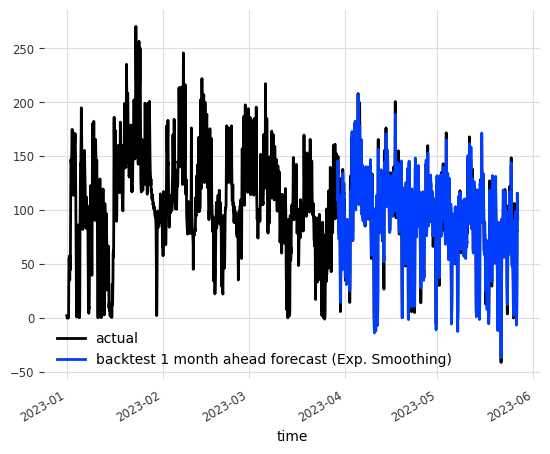

In [14]:
model_es = ExponentialSmoothing(seasonal_periods=24)
model_es.fit(train)
historical_forecast_es = model_es.historical_forecasts(
    ts, start=0.6, forecast_horizon=1, verbose=True)

ts.plot(label="actual")
historical_forecast_es.plot(label="backtest 1 month ahead forecast (Exp. Smoothing)")
es_rmse = rmse(historical_forecast_es, ts)
print("RMSE = {:.2f}%".format(es_rmse))